# Ligand Based Virtual Screening

In the evolving landscape of cancer therapeutics, the pursuit of novel and effective treatments remains a paramount objective. One promising avenue in this quest is the targeting of the Poly [ADP-ribose] polymerase-1 (PARP-1), a pivotal protein involved in DNA repair mechanisms. PARP-1, along with PARP-2, plays a crucial role in the repair of single-strand DNA breaks, thereby maintaining genomic integrity and cell viability. The inhibition of these proteins has emerged as a strategic therapeutic approach, especially in cancers where DNA repair pathways are already compromised, such as breast, ovarian, prostate, and pancreatic cancers.

This study delves into identifying potential inhibitors for PARP-1, a key therapeutic target in various cancer types. The rationale behind targeting PARP-1 lies in its significant role in DNA repair; its inhibition can lead to the accumulation of DNA damage in cancer cells, ultimately triggering cell death, particularly in cells deficient in other DNA repair mechanisms. This approach has been effective in BRCA1 and BRCA2 mutation-positive breast and ovarian cancers, highlighting the critical role of PARP-1 in tumorigenesis.

The research commenced with a comprehensive search for compounds capable of interacting with various proteins in the PARP family, utilizing the UNIPROT codes. Among these, PARP1 was selected due to the abundance of potential compounds found to interact with it, a key factor for the subsequent Quantitative Structure-Activity Relationship (QSAR) modeling. The QSAR approach necessitates a substantial dataset to train robust and predictive models, and the selection of PARP1 was strategic in meeting this requirement.

In [1]:
# libraries
import json            # lets us work with the json format
import requests        # allows Python to make web requests
import pandas as pd    # analysis of tabular data
import numpy as np     # numerical library

base_url = "https://www.ebi.ac.uk/chembl/api/data/{:s}"

In [2]:
target_protein_url = base_url.format("target_component?accession=P09874")
target_components = requests.get(target_protein_url, headers={"Accept":"application/json"}).json()["target_components"]
target_components[0]["targets"]

[{'target_chembl_id': 'CHEMBL3105'},
 {'target_chembl_id': 'CHEMBL3390820'},
 {'target_chembl_id': 'CHEMBL4742271'},
 {'target_chembl_id': 'CHEMBL4748223'}]

In [3]:
chembl_id = target_components[0]['targets'][0]['target_chembl_id'] # CHEMBL3105 PARP1
num_pages=7 # two dataframes
page_size=1000 # size of dataframes
all_data=[]
for page in range(1, num_pages + 1):
    offset = (page - 1) * page_size
    activity_url = base_url.format(f"activity?target_chembl_id__exact={chembl_id}&limit={page_size}&offset={offset}&type=IC50") # parameters of our query, searching by IC50
    response = requests.get(activity_url, headers={"Accept": "application/json"}) # get request to the ChemBL database
    if response.status_code == 200:
        activity_request = response.json()
        data = activity_request.get('activities', [])
        all_data.extend(data)
    else:
        print(f"Error in the request ({response.status_code}): {response.text}")
# molec_db = pd.DataFrame.from_dict(all_data)[['molecule_chembl_id', 'type','standard_value', 'standard_units', 'canonical_smiles']] # extract only information needed
# molec_db
molec_db = pd.DataFrame.from_dict(all_data)
molec_db_filtered = molec_db[molec_db['standard_units'] == 'nM'][['molecule_chembl_id', 'type', 'standard_value', 'standard_units', 'canonical_smiles']]
molec_db_filtered


,molecule_chembl_id,type,standard_value,standard_units,canonical_smiles
0,CHEMBL110347,IC50,5000.0,nM,CC(CC(=O)NCC(=O)c1ccc2ccccc2c1)n1c2c(c(=O)[nH]...
1,CHEMBL108702,IC50,20.0,nM,Nc1cccc(-c2ccc(C(=O)CNC(=O)CCn3c4c(c(=O)[nH]c3...
2,CHEMBL418816,IC50,3000.0,nM,O=C(CCn1c2c(c(=O)[nH]c1=O)CCC2)NCC(=O)N1CCN(c2...
3,CHEMBL108968,IC50,30.0,nM,O=C(CCn1c2c(c(=O)[nH]c1=O)CSCC2)NCC(=O)c1ccc(O...
4,CHEMBL430707,IC50,35.0,nM,O=C(CCn1c2c(c(=O)[nH]c1=O)CSCC2)NCC(=O)N1CCN(c...
...,...,...,...,...,...
3190,CHEMBL5209870,IC50,4.6,nM,COc1cc(OC)c2c(=O)[nH]c(-c3cc(C)c(OCCOc4ccccc4C...
3191,CHEMBL5197463,IC50,197.0,nM,COc1cc(OC)c2c(=O)[nH]c(-c3cccc(Cc4n[nH]c(=O)c5...
3192,CHEMBL521686,IC50,8.0,nM,O=C(c1cc(Cc2n[nH]c(=O)c3ccccc23)ccc1F)N1CCN(C(...
3193,CHEMBL1173055,IC50,0.8,nM,CNCc1ccc(-c2[nH]c3cc(F)cc4c3c2CCNC4=O)cc1


In [4]:
molec_db_filtered['standard_value'] = molec_db_filtered['standard_value'].astype(float)
molec_db = molec_db_filtered.sort_values(by = 'standard_value', ascending = True).dropna().reset_index(drop=True)
molec_db.head()

,molecule_chembl_id,type,standard_value,standard_units,canonical_smiles
0,CHEMBL4169012,IC50,0.02,nM,N#Cc1ccccc1N1CCN(C(=O)c2cc(Cc3n[nH]c(=O)c4cccc...
1,CHEMBL4161087,IC50,0.10,nM,Cc1ccc(N2CCN(C(=O)c3cc(Cc4n[nH]c(=O)c5ccccc45)...
2,CHEMBL4170665,IC50,0.10,nM,O=C(c1cc(Cc2n[nH]c(=O)c3ccccc23)cc(F)c1F)N1CCN...
3,CHEMBL4845834,IC50,0.19,nM,O=C(c1cc(Cc2n[nH]c(=O)c3ccccc23)ccc1F)N1CCN(c2...
4,CHEMBL4159834,IC50,0.20,nM,O=C(c1cc(Cc2n[nH]c(=O)c3ccccc23)cc(F)c1F)N1CCN...


## Query Molecule

The compound with the lowest IC50 value was chosen as the query molecule from the CHEMBL database. This compound represents the most potent inhibitor interacting with the PARP-1 protein and potentially others in the family. The selection of a potent inhibitor as the query molecule is crucial, as it sets a high benchmark for identifying similar compounds with potentially strong inhibitory effects.


In my research, first, I conducted a 2D similarity search in the PubChem database, focusing on identifying compounds that exhibit a high degree of structural similarity to a specific query molecule represented by its SMILES notation. I utilized a Tanimoto threshold of 0.8 for this search, indicating that I was seeking compounds with at least 80% similarity to my query molecule. This stringent threshold was strategically chosen to ensure the identification of compounds closely resembling the query molecule, thereby enhancing the chances of finding potent inhibitors sharing similar biological properties.

The search yielded a list of compound IDs (CIDs) from PubChem, each representing a chemical substance closely matching the structural criteria set by the Tanimoto coefficient. I noted the total number of compounds that met this high similarity criterion, which provides a clear perspective on the pool of compounds potentially relevant for my study.

In this way I have found 7976 compounds that show similarity (with the established threshol) to my molecule. 

In [13]:
base_url_pub = "https://pubchem.ncbi.nlm.nih.gov/rest/pug"
smiles = { 'smiles' : "N#Cc1ccccc1N1CCN(C(=O)c2cc(Cc3n[nH]c(=O)c4ccccc34)cc(F)c2F)CC1" }
url_2d = base_url_pub +"/compound/fastsimilarity_2d/smiles/cids/txt?Threshold=80"     #2D similarity search
response_2d = requests.post(url_2d,data=smiles)

cids_2d = response_2d.text.split()

print("# Number of compounds:", len(cids_2d))

# Number of compounds: 7976


I also conducted a 3D similarity search in the PubChem database, targeting compounds with a substantial three-dimensional structural resemblance to my query molecule, again defined by its SMILES notation. 

For this search, I set an even more stringent Tanimoto threshold of 0.95. This high threshold was intended to ensure that only compounds with a very high degree of 3D structural similarity to the query molecule were considered, aiming to identify those with the most promising biological and pharmacological profiles.

The search, however, resulted in identifying only a limited number of compounds. 9 compounds that met this rigorous similarity criterion. 

Initially, I had planned to perform a shape similarity calculation on these compounds to further refine and complement the search results. However, due to computational limitations, I was unable to carry out this additional analysis. Despite this setback, I decided to proceed with the subsequent stages of my research using the nine compounds identified.

The decision to move forward with these compounds, even without the shape similarity analysis, was based on the high degree of 3D similarity they shared with the query molecule. I anticipate that these compounds, due to their high structural congruence, could potentially exhibit relevant biological activities similar to the query molecule. This makes them valuable candidates for the next phases of my study

In [14]:
url_3d = base_url_pub +"/compound/fastsimilarity_3d/smiles/cids/txt?Threshold=95"      #3D similarity search
response_3d = requests.post(url_3d,data=smiles)
cids_3d = response_3d.text.split()

print("# Number of CIDs:", len(cids_3d))

# Number of CIDs: 9


I have then combined the results obtained from the 2D and 3D search in a single dataset and associated each compound (each PubChem DIC identifier) with its corresponding smiles in order to perform the virtual screening.

In [15]:
from time import time

cids_merge = cids_2d + cids_3d
print("# Total compounds:", len(cids_merge))

data=[]
start=time()
for cid in cids_merge:
  url = base_url_pub +f"/compound/cid/{cid}/property/canonicalSmiles/JSON"
  response = requests.get(url).json()
  print(response["PropertyTable"]["Properties"])
  data.append(response["PropertyTable"]["Properties"][0])
stop=time()
print("Total request time:", str(stop-start))

df = pd.DataFrame.from_dict(data)
df

# Total compounds: 7985
[{'CID': 23725625, 'CanonicalSMILES': 'C1CC1C(=O)N2CCN(CC2)C(=O)C3=C(C=CC(=C3)CC4=NNC(=O)C5=CC=CC=C54)F'}]
[{'CID': 11726399, 'CanonicalSMILES': 'C1CN(CCN1)C(=O)C2=C(C=CC(=C2)CC3=NNC(=O)C4=CC=CC=C43)F'}]
[{'CID': 56835134, 'CanonicalSMILES': 'CC(=O)NC1=CC=CC(=C1)C2CCN(CC2)CCCN3C(=O)C4=CC=CC=C4C(=N3)C5=CC(=C(C=C5)F)F'}]
[{'CID': 25218483, 'CanonicalSMILES': 'C1CCC(C1)C(=O)N2CCN(CC2)C(=O)C3=CC=CC(=C3)CC4=NNC(=O)C5=CC=CC=C54'}]
[{'CID': 25133976, 'CanonicalSMILES': 'CCC(=O)N1CCN(CC1)C(=O)C2=C(C=CC(=C2)CC3=NNC(=O)C4=CC=CC=C43)F'}]
[{'CID': 25133975, 'CanonicalSMILES': 'CC(=O)N1CCN(CC1)C(=O)C2=C(C=CC(=C2)CC3=NNC(=O)C4=CC=CC=C43)F'}]
[{'CID': 25133974, 'CanonicalSMILES': 'C1CC1CN2CCN(CC2)C(=O)C3=C(C=CC(=C3)CC4=NNC(=O)C5=CC=CC=C54)F'}]
[{'CID': 25133633, 'CanonicalSMILES': 'CCCN1CCN(CC1)C(=O)C2=C(C=CC(=C2)CC3=NNC(=O)C4=CC=CC=C43)F'}]
[{'CID': 25133632, 'CanonicalSMILES': 'CCN1CCN(CC1)C(=O)C2=C(C=CC(=C2)CC3=NNC(=O)C4=CC=CC=C43)F'}]
[{'CID': 25133631, 'CanonicalSMILES': 

,CID,CanonicalSMILES
0,23725625,C1CC1C(=O)N2CCN(CC2)C(=O)C3=C(C=CC(=C3)CC4=NNC...
1,11726399,C1CN(CCN1)C(=O)C2=C(C=CC(=C2)CC3=NNC(=O)C4=CC=...
2,56835134,CC(=O)NC1=CC=CC(=C1)C2CCN(CC2)CCCN3C(=O)C4=CC=...
3,25218483,C1CCC(C1)C(=O)N2CCN(CC2)C(=O)C3=CC=CC(=C3)CC4=...
4,25133976,CCC(=O)N1CCN(CC1)C(=O)C2=C(C=CC(=C2)CC3=NNC(=O...
...,...,...
7980,145962719,C1CCCC(CC1)N2CCN(CC2)C(=O)C3=C(C(=CC(=C3)CC4=N...
7981,69323697,COC1=CC=C(C=C1)N2CCN(CC2)C(=O)C3=C(C=CC(=C3)CC...
7982,69318490,CN(C)C(=O)CN1CCN(CC1)C(=O)C2=C(C=CC(=C2)CC3=NN...
7983,69090713,C1CCC2=C(C1)C(=NNC2=O)CC3=CC(=CC=C3)C(=O)N4CCC...


As the first step in data cleaning, I realized that some of the data were duplicated, meaning there were compounds with identical SMILES. Therefore, I decided to retain only one of each, ensuring that the dataset consisted of structurally distinct molecules.

In [16]:
df_clean = df.groupby("CanonicalSMILES", as_index=False).min().reset_index(drop = True)
print(str(df_clean.shape[0]), "structurally different molecules")
df_clean

6885 structurally different molecules


,CanonicalSMILES,CID
0,B1(OC(C(O1)(C)C)(C)C)C2=CC=C(C=C2)C(=O)N3CCN(C...,148228599
1,B1(OC(C(O1)(C)C)(C)C)C2=CC=C(C=C2)N3CC4(C3)CCN...,153339043
2,B1(OC(C(O1)(C)C)(C)C)C2=CC=C(C=C2)N3CC4(C3)CCN...,153339042
3,B1(OC(C(O1)(C)C)(C)C)C2=CC=C(C=C2)N3CC4(C3)CCN...,155656892
4,B1(OC(C(O1)(C)C)(C)C)C2=CC=C(C=C2)N3CC4(C3)CN(...,147037699
...,...,...
6880,[C-]#[N+]C1=CC=C(C=C1)CN2C(=O)C3=CC=CC=C3C(=N2...,153503054
6881,[CH3-].C1CCN(CC1)C(=O)C2=C(C=CC(=C2)CC3=NNC(=O...,158381963
6882,[CH3-].C1CN(CC[NH2+]1)C(=O)C2=C(C=CC(=C2)CC3=N...,160524649
6883,[HH].CC(=O)NC1=CC=C(C=C1)C2=C(C3=C(C=C2)C(=NN(...,160066325


### Positive Control: query molecule

I have added the query molecule as a control for the screening. This way, when calculating the different similarity metrics, it will be possible to observe and ensure that the obtained results are reliable.

In [17]:
# New SMILES molecule and its corresponding CID
new_smiles = "N#Cc1ccccc1N1CCN(C(=O)c2cc(Cc3n[nH]c(=O)c4ccccc34)cc(F)c2F)CC1"
new_cid = "query_control"
# Create a new DataFrame with the new row
new_row = pd.DataFrame({'CanonicalSMILES': [new_smiles], 'CID': [new_cid]})
# Add the new row to the existing DataFrame
df_clean = df_clean.append(new_row, ignore_index=True)
df_clean


C:\Users\alber\AppData\Local\Temp\ipykernel_8992\4218962618.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_clean = df_clean.append(new_row, ignore_index=True)


,CanonicalSMILES,CID
0,B1(OC(C(O1)(C)C)(C)C)C2=CC=C(C=C2)C(=O)N3CCN(C...,148228599
1,B1(OC(C(O1)(C)C)(C)C)C2=CC=C(C=C2)N3CC4(C3)CCN...,153339043
2,B1(OC(C(O1)(C)C)(C)C)C2=CC=C(C=C2)N3CC4(C3)CCN...,153339042
3,B1(OC(C(O1)(C)C)(C)C)C2=CC=C(C=C2)N3CC4(C3)CCN...,155656892
4,B1(OC(C(O1)(C)C)(C)C)C2=CC=C(C=C2)N3CC4(C3)CN(...,147037699
...,...,...
6881,[CH3-].C1CCN(CC1)C(=O)C2=C(C=CC(=C2)CC3=NNC(=O...,158381963
6882,[CH3-].C1CN(CC[NH2+]1)C(=O)C2=C(C=CC(=C2)CC3=N...,160524649
6883,[HH].CC(=O)NC1=CC=C(C=C1)C2=C(C3=C(C=C2)C(=NN(...,160066325
6884,[HH].CC1=C(C=CC2=C1C(=O)NN=C2CC3=CC=CC=C3)C4=C...,158608543


### Negative Control


I introduced the molecule "CCCCCCCC(=O)O" as a negative control in my study due to its stark structural contrast with my query molecule "N#Cc1ccccc1N1CCN(C(=O)c2cc(Cc3n[nH]c(=O)c4ccccc34)cc(F)c2F)CC1". My query molecule is characterized by a complex structure with multiple rings, including aromatic and heterocyclic components, and functional groups such as amides and fluorophenyls. In contrast, the negative control (octanoic acid), being a simple medium-chain saturated fatty acid without any ring structures or similar functional groups, offers a clear dissimilarity. This distinction makes it an ideal candidate to validate the specificity and reliability of my screening process.

In [18]:
# Negative control SMILES and its corresponding CID
negative_smiles = "CCCCCCCC(=O)O"  # Octanoic acid
negative_cid = "negative_control"
# New DataFrame with the new row for the negative control.
new_negative_row = pd.DataFrame({'CanonicalSMILES': [negative_smiles], 'CID': [negative_cid]})
# Add new row to existing DataFrame
df_clean = df_clean.append(new_negative_row, ignore_index=True)
df_clean


C:\Users\alber\AppData\Local\Temp\ipykernel_8992\152499468.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_clean = df_clean.append(new_negative_row, ignore_index=True)


,CanonicalSMILES,CID
0,B1(OC(C(O1)(C)C)(C)C)C2=CC=C(C=C2)C(=O)N3CCN(C...,148228599
1,B1(OC(C(O1)(C)C)(C)C)C2=CC=C(C=C2)N3CC4(C3)CCN...,153339043
2,B1(OC(C(O1)(C)C)(C)C)C2=CC=C(C=C2)N3CC4(C3)CCN...,153339042
3,B1(OC(C(O1)(C)C)(C)C)C2=CC=C(C=C2)N3CC4(C3)CCN...,155656892
4,B1(OC(C(O1)(C)C)(C)C)C2=CC=C(C=C2)N3CC4(C3)CN(...,147037699
...,...,...
6882,[CH3-].C1CN(CC[NH2+]1)C(=O)C2=C(C=CC(=C2)CC3=N...,160524649
6883,[HH].CC(=O)NC1=CC=C(C=C1)C2=C(C3=C(C=C2)C(=NN(...,160066325
6884,[HH].CC1=C(C=CC2=C1C(=O)NN=C2CC3=CC=CC=C3)C4=C...,158608543
6885,N#Cc1ccccc1N1CCN(C(=O)c2cc(Cc3n[nH]c(=O)c4cccc...,query_control


## RDKiT

In [27]:
# Import necessary libraries
from rdkit import Chem  # RDKit library for working with molecules
from rdkit.Chem import Draw, AllChem, MACCSkeys  # Submodules for molecule visualization, fingerprints, and shape comparison
import pandas as pd  # Library for data manipulation and analysis
from rdkit import DataStructs # Import module for working with fingerprint similarity
import requests
import matplotlib.pyplot as plt

In [28]:
smiles = 'N#Cc1ccccc1N1CCN(C(=O)c2cc(Cc3n[nH]c(=O)c4ccccc34)cc(F)c2F)CC1'
mol = Chem.MolFromSmiles(smiles)

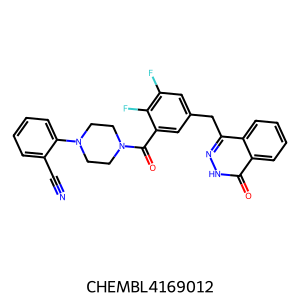

In [29]:
# Draw the molecule
Draw.MolToImage(mol, legend = "CHEMBL4169012")

## Morgan and MACCS fingerprints

In [30]:
MACCQuery = MACCSkeys.GenMACCSKeys(mol)

In [31]:
MACCQuery.ToBitString() 

'00000000000000000000000000000000000000000110000000001000000000100100010000010001100001110010101100101100010100110100011011101101110001111110001111011011011110110111110'

In [32]:
MorganQuery = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=2048)

In [33]:
MorganQuery.ToBitString() 

'000000000000000000000000000000000000000000000000000000000000000000000000001000001000000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000100000000000000000000000000000000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000011000000000000000100000100000000000000000000011000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001000000000000000000000001000000000000000000000000100000000000000000000000000000000000000000000000000100010000000000000000000000000100000000010000000000000000100000000000000000001000000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000001001000001000000100100000000000000000000000000000000000000000000000000000

## 

Now, I plan to conduct a comprehensive analysis of the molecules in the database, focusing on evaluating their structural resemblance to our query molecule by generating molecular fingerprints for each molecule in my dataset.

Two types of fingerprints will be employed: Morgan and MACCS fingerprints. Morgan fingerprints, also known as extended-connectivity fingerprints (ECFPs), capture the molecular structure by considering the circular neighborhoods of atoms, providing a detailed representation of the molecule's features. 
MACCS fingerprints, on the other hand, are based on predefined structural keys and offer a more general but still effective depiction of molecular characteristics.

Once these fingerprints are obtained for each molecule, I will calculate two widely used similarity coefficients: the Tanimoto and Dice coefficients. 
The Tanimoto coefficient, also known as the Jaccard index, measures the similarity between two sets by dividing the number of shared features by the total number of unique features in both sets. 
The Dice coefficient, closely related to the Tanimoto coefficient, also compares the overlap between two sets but emphasizes the shared features more heavily.

By computing these coefficients, I can quantitatively assess how similar each molecule in our database is to the query molecule. This similarity analysis is crucial for identifying potential candidates for further investigation, as molecules with higher similarity scores are more likely to exhibit similar biological activities to the query molecule.

In [37]:
df_clean['MACCS'] = df_clean['CanonicalSMILES'].apply(lambda x: MACCSkeys.GenMACCSKeys(Chem.MolFromSmiles(x)))

[12:17:23] WARNING: not removing hydrogen atom without neighbors
[12:17:23] WARNING: not removing hydrogen atom without neighbors


In [38]:
df_clean['Morgan'] = df_clean['CanonicalSMILES'].apply(
    lambda x: AllChem.GetMorganFingerprintAsBitVect(Chem.MolFromSmiles(x), 2, nBits=2048)
)

[12:17:49] WARNING: not removing hydrogen atom without neighbors
[12:17:49] WARNING: not removing hydrogen atom without neighbors


In [39]:
# Similarity of Tanimoto with MACCS fingerprints
df_clean['Tanimoto_MACCS'] = df_clean['MACCS'].apply(lambda x: DataStructs.FingerprintSimilarity(MACCQuery, x))

# Dice similarity with MACCS fingerprints
df_clean['Dice_MACCS'] = df_clean['MACCS'].apply(lambda x: DataStructs.DiceSimilarity(MACCQuery, x))

# Tanimoto's similarity with Morgan fingerprints
df_clean['Tanimoto_Morgan'] = df_clean['Morgan'].apply(lambda x: DataStructs.FingerprintSimilarity(MorganQuery, x))

# Similarity of Dice with Morgan fingerprints
df_clean['Dice_Morgan'] = df_clean['Morgan'].apply(lambda x: DataStructs.DiceSimilarity(MorganQuery, x))

df_similarity = df_clean.copy()

In [40]:
df_similarity

,CanonicalSMILES,CID,MACCS,Morgan,Tanimoto_MACCS,Dice_MACCS,Tanimoto_Morgan,Dice_Morgan
0,B1(OC(C(O1)(C)C)(C)C)C2=CC=C(C=C2)C(=O)N3CCN(C...,148228599,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.714286,0.833333,0.493976,0.661290
1,B1(OC(C(O1)(C)C)(C)C)C2=CC=C(C=C2)N3CC4(C3)CCN...,153339043,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.721519,0.838235,0.439560,0.610687
2,B1(OC(C(O1)(C)C)(C)C)C2=CC=C(C=C2)N3CC4(C3)CCN...,153339042,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.712500,0.832117,0.434783,0.606061
3,B1(OC(C(O1)(C)C)(C)C)C2=CC=C(C=C2)N3CC4(C3)CCN...,155656892,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.721519,0.838235,0.408602,0.580153
4,B1(OC(C(O1)(C)C)(C)C)C2=CC=C(C=C2)N3CC4(C3)CN(...,147037699,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...",0.683544,0.812030,0.443182,0.614173
...,...,...,...,...,...,...,...,...
6882,[CH3-].C1CN(CC[NH2+]1)C(=O)C2=C(C=CC(=C2)CC3=N...,160524649,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.805970,0.892562,0.555556,0.714286
6883,[HH].CC(=O)NC1=CC=C(C=C1)C2=C(C3=C(C=C2)C(=NN(...,160066325,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.686567,0.814159,0.165049,0.283333
6884,[HH].CC1=C(C=CC2=C1C(=O)NN=C2CC3=CC=CC=C3)C4=C...,158608543,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.634921,0.776699,0.261364,0.414414
6885,N#Cc1ccccc1N1CCN(C(=O)c2cc(Cc3n[nH]c(=O)c4cccc...,query_control,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.000000,1.000000,1.000000,1.000000


I have eliminated a molecule that had the same smile as my query molecule, since both resulted in 1 in the similarity analysis.

In [46]:
# Find the index of the row where the column 'CID' is equal to 145955534
index_to_drop = df_similarity[df_similarity['CID'] == 145955534].index

# Remove that row from the DataFrame
df_similarity.drop(index_to_drop, inplace=True)

## Verification of Controls
I have printed the first and last rows after calculating each of the coefficients to observe the controls. 

The rows have been sorted, so the positive control should be in the first position, and the negative control in the last.

In [47]:
# Tanimoto MACCS
sorted_Tanimoto_MACCS = df_similarity.sort_values(by='Tanimoto_MACCS', ascending=False)

# Dice MACCS
sorted_Dice_MACCS = df_similarity.sort_values(by='Dice_MACCS', ascending=False)

# Tanimoto Morgan
sorted_Tanimoto_Morgan = df_similarity.sort_values(by='Tanimoto_Morgan', ascending=False)

# Dice Morgan
sorted_Dice_Morgan = df_similarity.sort_values(by='Dice_Morgan', ascending=False)

In [48]:
print("Tanimoto MACCS Similarity:")
sorted_Tanimoto_MACCS.head(5)

Tanimoto MACCS Similarity:


,CanonicalSMILES,CID,MACCS,Morgan,Tanimoto_MACCS,Dice_MACCS,Tanimoto_Morgan,Dice_Morgan
6885,N#Cc1ccccc1N1CCN(C(=O)c2cc(Cc3n[nH]c(=O)c4cccc...,query_control,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.000000,1.000000,1.000000,1.000000
1993,C1CN(CCN1C2=CC=NC=C2)C(=O)C3=C(C(=CC(=C3)CC4=N...,145963753,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.983051,0.991453,0.720588,0.837607
1812,C1CN(CCN1C2=C3C=CC=CC3=NC4=CC=CC=C42)C(=O)C5=C...,168275938,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.983051,0.991453,0.581081,0.735043
1832,C1CN(CCN1C2=CC=C(C=C2)C#N)C(=O)C3=C(C(=CC(=C3)...,145957654,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.983051,0.991453,0.779412,0.876033
1919,C1CN(CCN1C2=CC=CC=C2)C(=O)C3=C(C(=CC(=C3)CC4=N...,145962718,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.966102,0.982759,0.753846,0.859649


In [49]:
sorted_Tanimoto_MACCS.tail(5)

,CanonicalSMILES,CID,MACCS,Morgan,Tanimoto_MACCS,Dice_MACCS,Tanimoto_Morgan,Dice_Morgan
3990,CC1=CC(=CC=C1)C(=O)NC2=CC=C(C=C2)C(=O)NN=CC3=C...,3304621,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.396825,0.568182,0.125000,0.222222
2733,CC(C)C(=O)NC1=CC=CC(=C1)C(=NNC(=O)C2=CC=CC3=CC...,1008126,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.393939,0.565217,0.129032,0.228571
6785,CNC1=CC(=C(C(=C1C=N)F)C(=O)NC2=CC(=C(C=C2)N)C(...,155134764,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.378788,0.549451,0.224490,0.366667
3709,CC1=CC(=C(C=C1)C(=O)NN=C(C)C2=CC(=C(C=C2)C)NC3...,145051043,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.369231,0.539326,0.107527,0.194175
6886,CCCCCCCC(=O)O,negative_control,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.128571,0.227848,0.054795,0.103896


In [50]:
sorted_Dice_MACCS.head(5)

,CanonicalSMILES,CID,MACCS,Morgan,Tanimoto_MACCS,Dice_MACCS,Tanimoto_Morgan,Dice_Morgan
6885,N#Cc1ccccc1N1CCN(C(=O)c2cc(Cc3n[nH]c(=O)c4cccc...,query_control,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.000000,1.000000,1.000000,1.000000
1993,C1CN(CCN1C2=CC=NC=C2)C(=O)C3=C(C(=CC(=C3)CC4=N...,145963753,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.983051,0.991453,0.720588,0.837607
1812,C1CN(CCN1C2=C3C=CC=CC3=NC4=CC=CC=C42)C(=O)C5=C...,168275938,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.983051,0.991453,0.581081,0.735043
1832,C1CN(CCN1C2=CC=C(C=C2)C#N)C(=O)C3=C(C(=CC(=C3)...,145957654,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.983051,0.991453,0.779412,0.876033
1919,C1CN(CCN1C2=CC=CC=C2)C(=O)C3=C(C(=CC(=C3)CC4=N...,145962718,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.966102,0.982759,0.753846,0.859649


In [51]:
sorted_Dice_MACCS.tail(5)

,CanonicalSMILES,CID,MACCS,Morgan,Tanimoto_MACCS,Dice_MACCS,Tanimoto_Morgan,Dice_Morgan
3990,CC1=CC(=CC=C1)C(=O)NC2=CC=C(C=C2)C(=O)NN=CC3=C...,3304621,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.396825,0.568182,0.125000,0.222222
2733,CC(C)C(=O)NC1=CC=CC(=C1)C(=NNC(=O)C2=CC=CC3=CC...,1008126,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.393939,0.565217,0.129032,0.228571
6785,CNC1=CC(=C(C(=C1C=N)F)C(=O)NC2=CC(=C(C=C2)N)C(...,155134764,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.378788,0.549451,0.224490,0.366667
3709,CC1=CC(=C(C=C1)C(=O)NN=C(C)C2=CC(=C(C=C2)C)NC3...,145051043,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.369231,0.539326,0.107527,0.194175
6886,CCCCCCCC(=O)O,negative_control,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.128571,0.227848,0.054795,0.103896


In [52]:
sorted_Tanimoto_Morgan.head(5)

,CanonicalSMILES,CID,MACCS,Morgan,Tanimoto_MACCS,Dice_MACCS,Tanimoto_Morgan,Dice_Morgan
6885,N#Cc1ccccc1N1CCN(C(=O)c2cc(Cc3n[nH]c(=O)c4cccc...,query_control,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.000000,1.000000,1.000000,1.000000
1965,C1CN(CCN1C2=CC=CC=C2F)C(=O)C3=C(C(=CC(=C3)CC4=...,145949467,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.966102,0.982759,0.838710,0.912281
1992,C1CN(CCN1C2=CC=CC=C2O)C(=O)C3=C(C(=CC(=C3)CC4=...,145952366,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.876923,0.934426,0.800000,0.888889
1832,C1CN(CCN1C2=CC=C(C=C2)C#N)C(=O)C3=C(C(=CC(=C3)...,145957654,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.983051,0.991453,0.779412,0.876033
1919,C1CN(CCN1C2=CC=CC=C2)C(=O)C3=C(C(=CC(=C3)CC4=N...,145962718,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.966102,0.982759,0.753846,0.859649


In [53]:
sorted_Tanimoto_Morgan.tail(5)

,CanonicalSMILES,CID,MACCS,Morgan,Tanimoto_MACCS,Dice_MACCS,Tanimoto_Morgan,Dice_Morgan
2358,CC(=NNC(=O)C(=CC1=CC=C(C=C1)N(C)C)NC(=O)C2=CC=...,43907075,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.422535,0.594059,0.084211,0.155340
4351,CC1=CC=CC=C1C=NNC(=O)C(=CC2=CC=C(C=C2)N(C)C)NC...,5099487,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.450704,0.621359,0.080000,0.148148
4183,CC1=CC=C(C=C1)C(=NNC(=O)C(=CC2=CC=C(C=C2)N(C)C...,43907076,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.422535,0.594059,0.080000,0.148148
2765,CC(C)C1=CC=C(C=C1)C(=NNC(=O)C(=CC2=CC=C(C=C2)N...,43907078,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.422535,0.594059,0.077670,0.144144
6886,CCCCCCCC(=O)O,negative_control,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.128571,0.227848,0.054795,0.103896


In [54]:
sorted_Dice_Morgan.head(5)

,CanonicalSMILES,CID,MACCS,Morgan,Tanimoto_MACCS,Dice_MACCS,Tanimoto_Morgan,Dice_Morgan
6885,N#Cc1ccccc1N1CCN(C(=O)c2cc(Cc3n[nH]c(=O)c4cccc...,query_control,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.000000,1.000000,1.000000,1.000000
1965,C1CN(CCN1C2=CC=CC=C2F)C(=O)C3=C(C(=CC(=C3)CC4=...,145949467,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.966102,0.982759,0.838710,0.912281
1992,C1CN(CCN1C2=CC=CC=C2O)C(=O)C3=C(C(=CC(=C3)CC4=...,145952366,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.876923,0.934426,0.800000,0.888889
1832,C1CN(CCN1C2=CC=C(C=C2)C#N)C(=O)C3=C(C(=CC(=C3)...,145957654,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.983051,0.991453,0.779412,0.876033
1919,C1CN(CCN1C2=CC=CC=C2)C(=O)C3=C(C(=CC(=C3)CC4=N...,145962718,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.966102,0.982759,0.753846,0.859649


In [55]:
sorted_Dice_Morgan.tail(5)

,CanonicalSMILES,CID,MACCS,Morgan,Tanimoto_MACCS,Dice_MACCS,Tanimoto_Morgan,Dice_Morgan
2358,CC(=NNC(=O)C(=CC1=CC=C(C=C1)N(C)C)NC(=O)C2=CC=...,43907075,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.422535,0.594059,0.084211,0.155340
4351,CC1=CC=CC=C1C=NNC(=O)C(=CC2=CC=C(C=C2)N(C)C)NC...,5099487,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.450704,0.621359,0.080000,0.148148
4183,CC1=CC=C(C=C1)C(=NNC(=O)C(=CC2=CC=C(C=C2)N(C)C...,43907076,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.422535,0.594059,0.080000,0.148148
2765,CC(C)C1=CC=C(C=C1)C(=NNC(=O)C(=CC2=CC=C(C=C2)N...,43907078,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.422535,0.594059,0.077670,0.144144
6886,CCCCCCCC(=O)O,negative_control,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.128571,0.227848,0.054795,0.103896


# Plotting the Results

I have created histograms for the different methods (MACCS and Morgan) with the various similarities (Tanimoto and Dice) to observe the results.

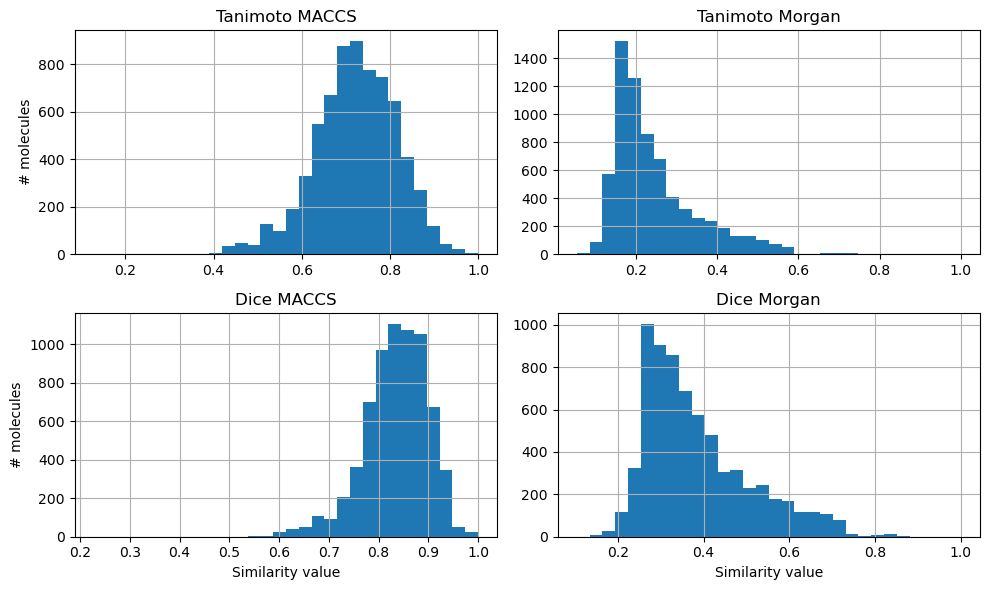

In [56]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(figsize=(10, 6), nrows=2, ncols=2)

# Tanimoto MACCS
df_similarity.hist(column='Tanimoto_MACCS', ax=axes[0, 0], bins=30)
axes[0, 0].set_title('Tanimoto MACCS')
axes[0, 0].set_ylabel('# molecules')

# Tanimoto Morgan
df_similarity.hist(column='Tanimoto_Morgan', ax=axes[0, 1], bins=30)
axes[0, 1].set_title('Tanimoto Morgan')

# Dice MACCS
df_similarity.hist(column='Dice_MACCS', ax=axes[1, 0], bins=30)
axes[1, 0].set_title('Dice MACCS')
axes[1, 0].set_xlabel('Similarity value')
axes[1, 0].set_ylabel('# molecules')

# Dice Morgan
df_similarity.hist(column='Dice_Morgan', ax=axes[1, 1], bins=30)
axes[1, 1].set_title('Dice Morgan')
axes[1, 1].set_xlabel('Similarity value')

plt.tight_layout()
plt.show()


The histograms displayed illustrate the distribution of similarity values calculated using two different fingerprint methods, MACCS and Morgan, and two similarity metrics, Tanimoto and Dice. In these histograms, higher similarity values are indicative of a closer resemblance to the query molecule.

Considering that both Tanimoto and Dice coefficients are metrics of similarity, the compounds with values approaching 1 are of particular interest for my study. These compounds are the ones that share the most features with the query molecule, suggesting a higher likelihood of exhibiting similar biological properties, which is the central focus of my research.

For both MACCS and Morgan fingerprints, the histograms show a bell-shaped distribution, with the majority of compounds having moderate similarity values. However, there is a noticeable subset of compounds with high similarity values (closer to 1), which stand out as the most promising candidates for further investigation. These are the compounds that I will prioritize, as their high degree of structural similarity to the query molecule makes them the most relevant for my objective of identifying potential inhibitors.

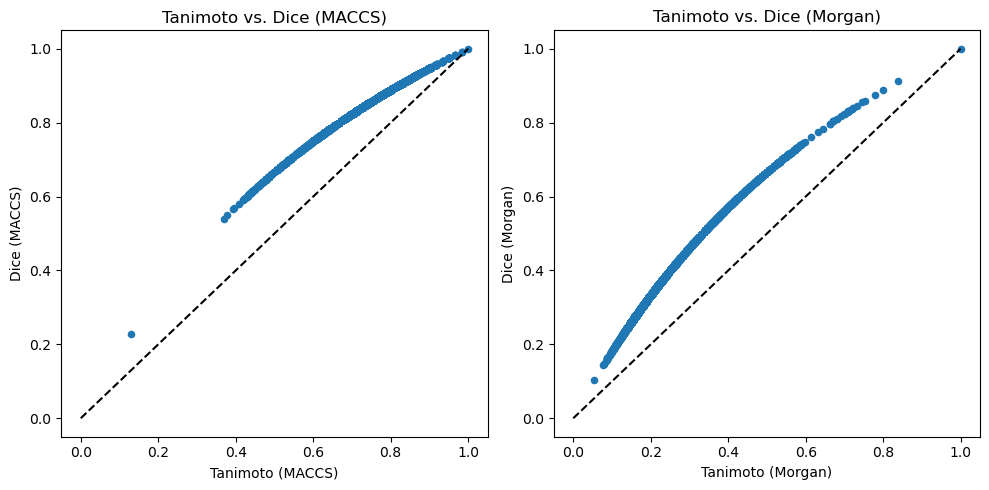

In [57]:
fig, axes = plt.subplots(figsize=(10, 5), nrows=1, ncols=2)

# Tanimoto vs. Dice with MACCS fingerprints
df_similarity.plot('Tanimoto_MACCS', 'Dice_MACCS', kind='scatter', ax=axes[0])
axes[0].plot([0, 1], [0, 1], 'k--')  # Dashed line for reference
axes[0].set_xlabel('Tanimoto (MACCS)')
axes[0].set_ylabel('Dice (MACCS)')
axes[0].set_title('Tanimoto vs. Dice (MACCS)')

# Tanimoto vs. Dice with Morgan fingerprints
df_similarity.plot('Tanimoto_Morgan', 'Dice_Morgan', kind='scatter', ax=axes[1])
axes[1].plot([0, 1], [0, 1], 'k--')  # Dashed line for reference
axes[1].set_xlabel('Tanimoto (Morgan)')
axes[1].set_ylabel('Dice (Morgan)')
axes[1].set_title('Tanimoto vs. Dice (Morgan)')

plt.tight_layout()
plt.show()


In [59]:
# Descriptive statistics for Tanimoto and Dice similarities of MACCS fingerprints
maccs_describe = df_similarity[['Tanimoto_MACCS', 'Dice_MACCS']].describe()

# Descriptive statistics for Tanimoto and Dice similarities of Morgan fingerprints
morgan_describe = df_similarity[['Tanimoto_Morgan', 'Dice_Morgan']].describe()

print("Descriptive Statistics for MACCS:")
print(maccs_describe)
print("\nDescriptive Statistics for Morgan:")
print(morgan_describe)

Descriptive Statistics for MACCS:
       Tanimoto_MACCS   Dice_MACCS
count     6886.000000  6886.000000
mean         0.721578     0.834842
std          0.092066     0.064463
min          0.128571     0.227848
25%          0.666667     0.800000
50%          0.725000     0.840580
75%          0.787879     0.881356
max          1.000000     1.000000

Descriptive Statistics for Morgan:
       Tanimoto_Morgan  Dice_Morgan
count      6886.000000  6886.000000
mean          0.245747     0.384252
std           0.104721     0.123074
min           0.054795     0.103896
25%           0.170213     0.290909
50%           0.212311     0.350258
75%           0.290698     0.450450
max           1.000000     1.000000


The scatter plots comparing the Tanimoto and Dice similarity coefficients for MACCS and Morgan fingerprints offer a clear visual representation of the correlation between these two measures. For both fingerprint types, the positive linear relationship indicates that as the Tanimoto similarity increases, so does the Dice similarity, as expected, since both are measures of chemical similarity.

From the descriptive statistics provided for the MACCS fingerprints, we can see that the mean Tanimoto similarity (0.721578) and Dice similarity (0.834842) are relatively high. This suggests that, on average, the compounds in the dataset have a substantial degree of similarity to the query molecule. 

In contrast, the Morgan fingerprints show significantly lower mean values for both Tanimoto (0.245747) and Dice (0.384252) coefficients.

Given the higher average similarity scores for MACCS fingerprints, particularly the Dice coefficient, which emphasizes the shared features more heavily, it makes a strong case for using the Dice_MACCS as the preferred metric for filtering compounds. The higher mean similarity score suggests that using Dice_MACCS would retain compounds with a greater resemblance to the query molecule, which is particularly useful for identifying potential inhibitors in a virtual screening scenario.

Choosing Dice_MACCS aligns with the goal of my research to prioritize compounds that are most structurally similar to the query molecule, as these are more likely to share its biological activity. The choice is further substantiated by the histograms and the scatter plots, which together provide a compelling argument for selecting Dice_MACCS as the similarity measure to filter and select compounds for subsequent research stages.

### Dice_MACSS

In [66]:
threshold_dice_MACCS = 0.91

# Filter the DataFrame based on threshold
filtered_df = df_similarity[
    (df_similarity['Dice_MACCS'] >= threshold_dice_MACCS) 
]

print(len(filtered_df))

718


In [67]:
# Save the DataFrame to a CSV file
filtered_df.to_csv('filtered_compounds.csv', index=False)